In [1]:
import math
import numpy

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

### Input

In [2]:
words = open('names.txt', 'r').read().splitlines()
print(f'{len(words)}')

chars = list('abcdefghijklmnopqrstuvwxyz')
stoi_lookup = {c: i+1 for i, c in enumerate(chars)}
stoi_lookup['.'] = 0
itos_lookups = {i: char for char, i in stoi_lookup.items()}

# Dataset creation

block_size = 3 # context length
X, Y = [], []

for word in words:
    context = [0] * block_size
    seq = word + '.'    # don't forget to add the . add the end

    for char in seq:
        X.append(context)
        y_i = stoi_lookup[char]
        Y.append(y_i)
        context = context[1:] + [y_i]

X = torch.tensor(X)
Y = torch.tensor(Y)

X.shape, X.dtype, Y.shape, Y.dtype

32033


(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

Embedding Lookup table - initialized with random values in the beginning

In [3]:
# 27 chars emebedded into two dims randomly
dims = 2
C = torch.randn((27, dims))
embs = C[X]
embs.shape

torch.Size([228146, 3, 2])

## Neural Network

In [30]:
print("the dataset: ", X.shape, Y.shape)

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

params = [C, W1, b1, W2, b2]

print("Number of parameters in the network: ", sum(p.nelement() for p in params))

# set the p.grad requires to true first so that we are able to get the grad for the params
for p in params:
    p.requires_grad = True

the dataset:  torch.Size([228146, 3]) torch.Size([228146])
Number of parameters in the network:  3481


In [16]:
for step in range(100):
    # forward pass
    ix = torch.randint(0, X.shape[0], (32, ))
    # make sure to only select the indices in the current mini batch
    embs = C[X[ix]]
    h = torch.tanh(embs.view(-1, block_size*dims) @ W1 + b1)
    logits = h @ W2 + b2
    # only select the indices in the current mini batch
    loss = F.cross_entropy(logits, Y[ix])
    print(f'{loss=}')
    
    # backward pass
    # set the gradients to 0 - IMP
    for p in params:
        p.grad = None
    
    # calculate the gradients of the loss w.r.t params
    loss.backward()
    
    # update the params
    for p in params:
        l_rate = 0.1 # learning rate 
        p.data += -l_rate * p.grad

loss=tensor(17.9727, grad_fn=<NllLossBackward0>)
loss=tensor(13.8143, grad_fn=<NllLossBackward0>)
loss=tensor(14.5994, grad_fn=<NllLossBackward0>)
loss=tensor(15.9662, grad_fn=<NllLossBackward0>)
loss=tensor(14.2549, grad_fn=<NllLossBackward0>)
loss=tensor(12.7655, grad_fn=<NllLossBackward0>)
loss=tensor(13.1703, grad_fn=<NllLossBackward0>)
loss=tensor(12.7367, grad_fn=<NllLossBackward0>)
loss=tensor(10.4205, grad_fn=<NllLossBackward0>)
loss=tensor(10.7171, grad_fn=<NllLossBackward0>)
loss=tensor(10.9041, grad_fn=<NllLossBackward0>)
loss=tensor(9.1387, grad_fn=<NllLossBackward0>)
loss=tensor(9.6838, grad_fn=<NllLossBackward0>)
loss=tensor(10.6961, grad_fn=<NllLossBackward0>)
loss=tensor(10.2888, grad_fn=<NllLossBackward0>)
loss=tensor(8.7926, grad_fn=<NllLossBackward0>)
loss=tensor(9.8958, grad_fn=<NllLossBackward0>)
loss=tensor(8.6158, grad_fn=<NllLossBackward0>)
loss=tensor(9.2679, grad_fn=<NllLossBackward0>)
loss=tensor(7.6744, grad_fn=<NllLossBackward0>)
loss=tensor(7.0332, grad_fn

### How can we choose a good learning rate, 
- we can try different learning rates
- plot the losses for those learning rates to understand which learning rate would be optimal

In [27]:
# learning rates
lre = torch.linspace(-3, 0, 1000) 
lrs= 10 ** lre # 0.001 to 1
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

lets train the network with these learning rates

In [31]:
# store the learning rates and losses
l_rates = []
losses = []

for step in range(1000):
    # forward pass
    ix = torch.randint(0, X.shape[0], (32, ))
    # make sure to only select the indices in the current mini batch
    embs = C[X[ix]]
    h = torch.tanh(embs.view(-1, block_size*dims) @ W1 + b1)
    logits = h @ W2 + b2
    # only select the indices in the current mini batch
    loss = F.cross_entropy(logits, Y[ix])
    print(f'{loss=}')
    
    # backward pass
    # set the gradients to 0 - IMP
    for p in params:
        p.grad = None
    
    # calculate the gradients of the loss w.r.t params
    loss.backward()
    
    l_rate = lrs[step]
    # update the params
    for p in params:
        # l_rate = 0.1 # learning rate 
        p.data += -l_rate * p.grad

    # track the learning rate and loss
    l_rates.append(l_rate)
    losses.append(loss.item())

loss=tensor(17.3253, grad_fn=<NllLossBackward0>)
loss=tensor(18.5967, grad_fn=<NllLossBackward0>)
loss=tensor(22.0757, grad_fn=<NllLossBackward0>)
loss=tensor(19.9697, grad_fn=<NllLossBackward0>)
loss=tensor(19.6514, grad_fn=<NllLossBackward0>)
loss=tensor(20.0479, grad_fn=<NllLossBackward0>)
loss=tensor(16.1620, grad_fn=<NllLossBackward0>)
loss=tensor(18.9437, grad_fn=<NllLossBackward0>)
loss=tensor(20.6769, grad_fn=<NllLossBackward0>)
loss=tensor(22.5803, grad_fn=<NllLossBackward0>)
loss=tensor(17.2446, grad_fn=<NllLossBackward0>)
loss=tensor(21.8621, grad_fn=<NllLossBackward0>)
loss=tensor(20.4696, grad_fn=<NllLossBackward0>)
loss=tensor(19.4321, grad_fn=<NllLossBackward0>)
loss=tensor(17.3917, grad_fn=<NllLossBackward0>)
loss=tensor(18.3079, grad_fn=<NllLossBackward0>)
loss=tensor(19.3496, grad_fn=<NllLossBackward0>)
loss=tensor(20.5044, grad_fn=<NllLossBackward0>)
loss=tensor(19.0476, grad_fn=<NllLossBackward0>)
loss=tensor(22.2821, grad_fn=<NllLossBackward0>)
loss=tensor(18.2118,

lets plot the learning rates and losses

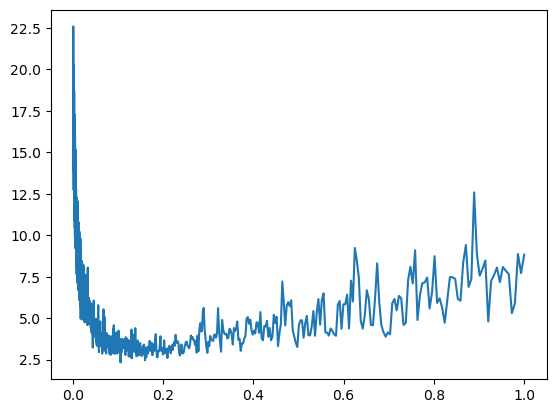

In [32]:
plt.plot(l_rates, losses)

### Note:
we can seee from the above plot that the learning rate stabilized somewhere around 0.1-0.2 and then became unstable again after that 

so 0.1 seems like a good value for the learning rate, which we have tried initially!

So we can choose a learning rate by doing this exercise!